In [3]:
from Bio import SeqIO
import os
import json
import os
from pymol import cmd
import statistics

location = "/mnt/d/from_desktop/alphafold_work/18.Per-domains"

list_of_interaction_folders = os.listdir(location)

# diapause_species = ["Danaus_plexippus","Nymphalis_c_album","Nymphalis_polychloros","Nymphalis_urticae","Nymphalis_io","Lysandra_coridon","Plebejus_argus","Aporia_crataegi","Argynnis_bischoffii_washingtonia","Aricia_artaxerxes","Aricia_agestis","Boloria_euphrosyne","Brenthis_hecate","Brenthis_daphne","Brenthis_ino","Coenonympha_glycerion","Colias_nastes","Cyaniris_semiargus","Erebia_aethiops","Erebia_ligea","Euphydryas_editha","Fabriciana_adippe","Hipparchia_semele","Lasiommata_megera","Lysandra_bellargus","Maniola_hyperantus","Maniola_jurtina","Melanargia_galathea","Melitaea_cinxia","Mellicta_athalia","Oeneis_ivallda","Parnassius_glacialis","Phengaris_arion","Polyommatus_icarus","Colias_eurytheme","Pararge_aegeria","Boloria_selene","Calycopis_cecrops","Anthocharis_cardamines","Battus_philenor","Celastrina_argiolus","Glaucopsyche_alexis","Leptidea_juvernica","Leptidea_sinapis","Leptidea_reali","Papilio_xuthus","Papilio_machaon","Papilio_glaucus","Pieris_napi","Pieris_mannii","Pieris_rapae","Pieris_brassicae","Hypolimnas_misippus","Pieris_melete"]
# non_diapause_species = ["Bicyclus_anynana","Colias_croceus","Danaus_chrysippus","Dircenna_loreta","Dryadula_phaetusa","Dryas_iulia_moderata","Eueides_isabella","Eurema_hecabe","Heliconius_charithonia","Heliconius_nattereri","Heliconius_sara","Leptophobia_aripa","Mechanitis_messenoides","Mechanitis_mazaeus","Melinaea_menophilus","Melinaea_marsaeus_rileyi","Napeogenes_sylphis","Napeogenes_inachia","Ornithoptera_alexandrae","Ornithoptera_priamus","Papilio_demoleus","Papilio_protenor","Papilio_polytes","Papilio_memnon","Papilio_dardanus_tibullus","Papilio_elwesi","Philaethria_dido","Phoebis_sennae","Teinopalpus_imperialis","Troides_oblongomaculatus","Troides_aeacus","Vanessa_cardui","Vanessa_atalanta","Vanessa_tameamea","Zerene_cesonia"]

# output_list = "Species,Diapause,Run,Num_sites,RegionA(0-500),RegionB(500-1000),RegionC(>1000)"
output_list = "Connection_from\tResidue_start\tResidue_stop\tConnection_to\tResidue_start\tResidue_stop"
# print(list_of_folders)
for folder in list_of_interaction_folders:
    # print (folder)
    species ="_".join (folder.split("_")[:-1])
    species = species[0].upper()+species[1:]
    gene_name = folder.split("_")[-1]
    # if species not in diapause_species and species not in non_diapause_species:
    #     print(species," missing")
    #     continue 
    print(species)
    # break
    list_of_files = os.listdir(f"{location}/{folder}")
    
    for file_name in list_of_files:
        if file_name.endswith(".cif"):
            interacting_residues = []
            file_number = file_name.split("_")[-1][0]
            cmd.reinitialize()
        
            cmd.load(f'{location}/{folder}/{file_name}')
            cmd.select('chainA', 'chain A')
            cmd.select('chainB', 'chain B')
            
            cmd.select('close_residues', '(chainA within 5 of chainB)')
            
            output = []
            
                # Iterate over the selected residues and add to output list
            cmd.iterate('close_residues', 'output.append(f"{resi}\t{chain}\t{resn}")', space={'output': output})
            if interacting_residues == []:
                interacting_residues = list(set(output))
            interacting_residues_sorted = sorted(interacting_residues)
            print(interacting_residues_sorted)
            assert False



        iteraction_dictionary = (get_interacting_residues_on_other_chain(list_of_files,location,folder,interacting_chain,interacting_residues,sorted_residues))

        if interacting_chain == "A":
            connection_from = folder.lower().split("_")[-1].split("x")[0]
            connection_to = folder.lower().split("_")[-1].split("x")[1]
        if interacting_chain == "B":
            connection_from = folder.lower().split("_")[-1].split("x")[1]
            connection_to = folder.lower().split("_")[-1].split("x")[0]
        print(folder.lower().split("_")[-1],interacting_chain,connection_from,  connection_to)
        for key,value in iteraction_dictionary.items():
            # print(key,value)
            for interaction_in_chain_B_residues in value:
                final_output_table += f"\n{connection_from}\t{key}\t{key}\t{connection_to}\t{interaction_in_chain_B_residues}\t{interaction_in_chain_B_residues}"
            # regionA,regionB,regionC = 0,0,0
            # for residue in interacting_residues_sorted:
            #     # print(residue)
            #     if int(residue.split("\t")[0]) < 500:
            #         regionA += 1
            #     elif int(residue.split("\t")[0]) >= 500 and int(residue.split("\t")[0]) < 1000:
            #         regionB += 1
            #     else:
            #         regionC += 1
            # print(interacting_residues_sorted)
            # if species in diapause_species:
            output_list += f"\n{species},{gene_name},Run_{file_number},{len(interacting_residues_sorted)}"
            # elif species in non_diapause_species:
            #     output_list += f"\n{species},NonDiapause,Run_{file_number},{len(interacting_residues_sorted)},{regionA},{regionB},{regionC}"
            # else:
            #     print(species," missing")
            # # assert False
    # break
print(output_list)

Danaus_plexippus
['1000\tA\tARG', '1004\tA\tLEU', '1007\tA\tVAL', '1008\tA\tLEU', '1011\tA\tASP', '1014\tA\tLYS', '1015\tA\tLEU', '1018\tA\tLEU', '1019\tA\tGLU', '1020\tA\tGLN', '1021\tA\tPRO', '1022\tA\tLEU', '1024\tA\tVAL', '1027\tA\tGLN', '1028\tA\tLEU', '1031\tA\tLEU', '1044\tA\tLEU', '1048\tA\tGLU', '191\tA\tTHR', '196\tA\tPRO', '199\tA\tMET', '203\tA\tARG', '253\tA\tARG', '255\tA\tTYR', '256\tA\tARG', '257\tA\tGLY', '258\tA\tLEU', '259\tA\tASN', '260\tA\tLEU', '261\tA\tGLY', '262\tA\tPHE', '263\tA\tGLY', '264\tA\tILE', '266\tA\tGLU', '267\tA\tLYS', '268\tA\tTHR', '429\tA\tMET', '762\tA\tMET', '981\tA\tPRO', '982\tA\tSER', '983\tA\tTRP', '984\tA\tVAL', '986\tA\tGLU', '987\tA\tVAL', '988\tA\tCYS', '989\tA\tVAL', '993\tA\tLEU', '996\tA\tLYS', '997\tA\tTYR', '999\tA\tILE']


AssertionError: 

In [ ]:
def get_interacting_residues_on_other_chain(list_of_files,location,folder,interacting_chain,interacting_residues,sorted_residues):
    iteraction_dictionary = {}
    
    for residue_detail in sorted_residues:
        residue_number = residue_detail.split("\t")[0]
        # print(residue_number)
        iteraction_dictionary[residue_number] = []
        iteracting_residue_alternate_chain = []
        for file_name in list_of_files:
            if file_name.endswith(".cif"):
                cmd.reinitialize()
                cmd.load(f'{location}/1.Models/{folder}/{file_name}')
                cmd.select('chainA', 'chain A')
                cmd.select('chainB', 'chain B')

                if interacting_chain == "A":
                    cmd.select('close_to_residue', f'chainB within 5 of chainA and chainA and resi {residue_number}')
                else:
                    cmd.select('close_to_residue', f'chainA within 5 of chainB and chainB and resi {residue_number}')
                
                output = []
                cmd.iterate('close_to_residue', 'output.append(f"{resi}\t{chain}\t{resn}")', space={'output': output})

                if iteracting_residue_alternate_chain == []:
                    iteracting_residue_alternate_chain = list(set(output))
                
                iteracting_residue_alternate_chain_sorted = sorted(iteracting_residue_alternate_chain)
                for residue in iteracting_residue_alternate_chain:
                    if residue not in output:
                        iteracting_residue_alternate_chain_sorted.remove(residue)
                iteracting_residue_alternate_chain = iteracting_residue_alternate_chain_sorted
        
        # print( iteracting_residue_alternate_chain)
        if interacting_chain == "A":
            filtered_residue = check_using_plddts(list_of_files,location,folder,"B",iteracting_residue_alternate_chain,plddt_dictionary)
        else:
            filtered_residue = check_using_plddts(list_of_files,location,folder,"A",iteracting_residue_alternate_chain,plddt_dictionary)
        # print(filtered_residue)
        for residues_in_other_chain in filtered_residue:
            iteraction_dictionary[residue_number].append(residues_in_other_chain.split("\t")[0])

    return(iteraction_dictionary)
        

In [25]:
def get_residues(list_of_files,location,folder,interacting_chain):
    interacting_residues = []
    output_list = []
    count_sites = {}
    for file_name in list_of_files:
        
        if file_name.endswith(".cif"):
            
            cmd.reinitialize()
        
            cmd.load(f'{location}/{folder}/{file_name}')
            cmd.select('chainA', 'chain A')
            cmd.select('chainB', 'chain B')
            if interacting_chain == "A":
                cmd.select('close_residues', '(chainA within 5 of chainB)')
            else:
                cmd.select('close_residues', '(chainB within 5 of chainA)')
            output = []
            cmd.iterate('close_residues', 'output.append(f"{resi}\t{chain}\t{resn}")', space={'output': output})
            interacting_residues_sorted = sorted(set(output +interacting_residues ))
            for residue_detail in interacting_residues_sorted:
                if residue_detail.split("\t")[0] not in count_sites:
                    count_sites[residue_detail.split("\t")[0]] = 0
                count_sites[residue_detail.split("\t")[0]] += 1
                
            # output_list.append(set(output))
            
            # if interacting_residues == []:
            #     interacting_residues = list(set(output))
            # interacting_residues_sorted = sorted(interacting_residues)
            # for residue in interacting_residues:
            
            #     if residue not in output:
            
            #         interacting_residues_sorted.remove(residue)
  #  # print(output_list)
    # # print(len(x) for x in output_list)
   # # sizes = [len(x) for x in output_list]
    # longest_index = max(enumerate(output_list), key=lambda x: len(x[1]))[0]
    # # print(longest_index)
    # interacting_residues = list(set(output_list[longest_index]))
    # interacting_residues_sorted = sorted(interacting_residues)
    # for output in output_list:
    #     for residue in interacting_residues:
    #         if residue not in output:
    #             if residue in interacting_residues_sorted:
    #                 interacting_residues_sorted.remove(residue)
            
    #     # if interacting_residues == []:
    # print(interacting_residues_sorted)
    # for residue in interacting_residues_sorted:
    #     print(residue)
    interacting_residues_sorted = []
    # print(count_sites)
    for key, value in count_sites.items():
        if value > 3:
            interacting_residues_sorted.append(f"{key}\tA\tAA")
    # assert False
    
    return(interacting_residues_sorted)

        

In [26]:
def get_interacting_residues_on_other_chain(list_of_files,location,folder,interacting_chain,interacting_residues,sorted_residues):
    iteraction_dictionary = {}
    
    for residue_detail in sorted_residues:
        residue_number = residue_detail.split("\t")[0]
        # print(residue_number)
        iteraction_dictionary[residue_number] = []
        iteracting_residue_alternate_chain = []
        for file_name in list_of_files:
            if file_name.endswith(".cif"):
                cmd.reinitialize()
                cmd.load(f'{location}/{folder}/{file_name}')
                cmd.select('chainA', 'chain A')
                cmd.select('chainB', 'chain B')

                if interacting_chain == "A":
                    cmd.select('close_to_residue', f'chainB within 5 of chainA and chainA and resi {residue_number}')
                else:
                    cmd.select('close_to_residue', f'chainA within 5 of chainB and chainB and resi {residue_number}')
                
                output = []
                cmd.iterate('close_to_residue', 'output.append(f"{resi}\t{chain}\t{resn}")', space={'output': output})

                if iteracting_residue_alternate_chain == []:
                    iteracting_residue_alternate_chain = list(set(output))
                
                iteracting_residue_alternate_chain_sorted = sorted(iteracting_residue_alternate_chain)
                for residue in iteracting_residue_alternate_chain:
                    if residue not in output:
                        iteracting_residue_alternate_chain_sorted.remove(residue)
                iteracting_residue_alternate_chain = iteracting_residue_alternate_chain_sorted
        
        # print( iteracting_residue_alternate_chain)
        if interacting_chain == "A":
            filtered_residue = check_using_plddts(list_of_files,location,folder,"B",iteracting_residue_alternate_chain,plddt_dictionary)
        else:
            filtered_residue = check_using_plddts(list_of_files,location,folder,"A",iteracting_residue_alternate_chain,plddt_dictionary)
        # print(filtered_residue)
        for residues_in_other_chain in iteracting_residue_alternate_chain:
            iteraction_dictionary[residue_number].append(residues_in_other_chain.split("\t")[0])

    return(iteraction_dictionary)
        
            

In [27]:
def check_using_plddts(list_of_files,location,folder,interacting_chain,interacting_residues,plddt_dictionary):
    interacting_residues_sorted = sorted(interacting_residues)
    # print(len(interacting_residues))
    # print(interacting_residues)
    for i,name in enumerate(interacting_residues):
        # print(name)
        # print(i, name)
        name_split = name.split("\t")
        # print((name),(plddt_dictionary[name_split[1]][int(name_split[0])]))
        if min(plddt_dictionary[name_split[1]][int(name_split[0])]) < 30:
            # print("removed",name)
            interacting_residues_sorted.remove(name)
    # print(len(interacting_residues))
    # print(interacting_residues)
    return(sorted(interacting_residues_sorted))

In [28]:
def make_plddt_dictionary(list_of_files,location,folder):
    plddt_dictionary = {}
    plddt_dictionary["A"] = {}
    plddt_dictionary["B"] = {}
    # print(plddt_dictionary)

    for file_name in list_of_files:
        if "_full_data_" in file_name:
            # print(file_name)
            with open(f"{location}/{folder}/{file_name}") as json_file:
                data = json.load(json_file)
            # for key,value in data.items():
            #     print(key)
            # assert False
            for i in range(0,len(data["token_chain_ids"])):
                if data["token_res_ids"][i] not in plddt_dictionary[data["token_chain_ids"][i]]:
                    plddt_dictionary[data["token_chain_ids"][i]][data["token_res_ids"][i]] = [data["atom_plddts"][i]]
                else:
                    plddt_dictionary[data["token_chain_ids"][i]][data["token_res_ids"][i]].append(data["atom_plddts"][i])
    return(plddt_dictionary)

In [31]:
from Bio import SeqIO
import os
import json
import os
from pymol import cmd
import statistics


location = "/mnt/d/from_desktop/alphafold_work/17.tim-cry2-all"


final_output_table = "Connection_from\tResidue_start\tResidue_stop\tConnection_to\tResidue_start\tResidue_stop"


### Dia Nondia only
diapause_species = ["Danaus_plexippus","Nymphalis_c_album","Nymphalis_polychloros","Nymphalis_urticae","Nymphalis_io","Lysandra_coridon","Plebejus_argus","Aporia_crataegi","Argynnis_bischoffii_washingtonia","Aricia_artaxerxes","Aricia_agestis","Boloria_euphrosyne","Brenthis_hecate","Brenthis_daphne","Brenthis_ino","Coenonympha_glycerion","Colias_nastes","Cyaniris_semiargus","Erebia_aethiops","Erebia_ligea","Euphydryas_editha","Fabriciana_adippe","Hipparchia_semele","Lasiommata_megera","Lysandra_bellargus","Maniola_hyperantus","Maniola_jurtina","Melanargia_galathea","Melitaea_cinxia","Mellicta_athalia","Oeneis_ivallda","Parnassius_glacialis","Phengaris_arion","Polyommatus_icarus","Colias_eurytheme","Pararge_aegeria","Boloria_selene","Calycopis_cecrops","Anthocharis_cardamines","Battus_philenor","Celastrina_argiolus","Glaucopsyche_alexis","Leptidea_juvernica","Leptidea_sinapis","Leptidea_reali","Papilio_xuthus","Papilio_machaon","Papilio_glaucus","Pieris_napi","Pieris_mannii","Pieris_rapae","Pieris_brassicae","Hypolimnas_misippus","Pieris_melete"]
non_diapause_species = ["Bicyclus_anynana","Colias_croceus","Danaus_chrysippus","Dircenna_loreta","Dryadula_phaetusa","Dryas_iulia_moderata","Eueides_isabella","Eurema_hecabe","Heliconius_charithonia","Heliconius_nattereri","Heliconius_sara","Leptophobia_aripa","Mechanitis_messenoides","Mechanitis_mazaeus","Melinaea_menophilus","Melinaea_marsaeus_rileyi","Napeogenes_sylphis","Napeogenes_inachia","Ornithoptera_alexandrae","Ornithoptera_priamus","Papilio_demoleus","Papilio_protenor","Papilio_polytes","Papilio_memnon","Papilio_dardanus_tibullus","Papilio_elwesi","Philaethria_dido","Phoebis_sennae","Teinopalpus_imperialis","Troides_oblongomaculatus","Troides_aeacus","Vanessa_cardui","Vanessa_atalanta","Vanessa_tameamea","Zerene_cesonia"]

output_list = "Species,Diapause,Num_sites"




interacting_chain_list = ["B","A"]
interacting_chain_list = ["A"]
for interacting_chain in interacting_chain_list:
    list_of_interaction_folders = os.listdir(f"{location}")
    if "desktop.ini" in list_of_interaction_folders:
        list_of_interaction_folders.remove("desktop.ini")
    # list_of_interaction_folders = ["fold_2024_10_24_19_21_pararge_aegeria_periodxcry2"]
    for folder in list_of_interaction_folders:
        # print(folder.lower().split("_")[-1])
        species ="_".join (folder.split("_")[:-1])
        species = species[0].upper()+species[1:]
        if species not in diapause_species and species not in non_diapause_species:
            print(species," missing")
            continue 
        print(species)

        list_of_files_all = os.listdir(f"{location}/{folder}")
        # if "desktop.ini" in list_of_files:
        #     list_of_files.remove("desktop.ini")

        
        all_interaction = {}
        interacting_sites = []
        
        # plddt_dictionary = make_plddt_dictionary(list_of_files_all,location,folder)
        for file_name in list_of_files_all:
            if file_name.endswith(".cif"):
                list_of_files = [file_name]
                file_number = file_name.split("_")[-1][0]
                
        
        interacting_residues = get_residues(list_of_files_all,location,folder,interacting_chain)
                # print()
                # length_of_A_chain = get_length_of_A_chain(list_of_files,location,folder)
                # print(length_of_A_chain)
        print(len(interacting_residues))
        if species in diapause_species:
            output_list += f"\n{species},Diapause,{len(interacting_residues)}"
        elif species in non_diapause_species:
            output_list += f"\n{species},NonDiapause,{len(interacting_residues)}"
        else:
            print(species," missing")
                # assert False
                # sorted_residues = (check_using_plddts(list_of_files,location,folder,interacting_chain,interacting_residues,plddt_dictionary))
        # sorted_residues = interacting_residues
        # print(len(sorted_residues))
        #         iteraction_dictionary = (get_interacting_residues_on_other_chain(list_of_files,location,folder,interacting_chain,interacting_residues,sorted_residues))
        
        #         if interacting_chain == "A":
        #             connection_from = folder.lower().split("_")[-1].split("x")[0]
        #             connection_to = folder.lower().split("_")[-1].split("x")[1]
        #         if interacting_chain == "B":
        #             connection_from = folder.lower().split("_")[-1].split("x")[1]
        #             connection_to = folder.lower().split("_")[-1].split("x")[0]
        #         # print(folder.lower().split("_")[-1],interacting_chain,connection_from,  connection_to)
        #         for key,value in iteraction_dictionary.items():
        #             # print(key,value)
        #             if key not in interacting_sites:
        #                 interacting_sites.append(key)
        #             for interaction_in_chain_B_residues in value:
        #                 final_output_table += f"\n{connection_from}\t{key}\t{key}\t{connection_to}\t{interaction_in_chain_B_residues}\t{interaction_in_chain_B_residues}"
        #         # print(iteraction_dictionary)
        #         all_interaction[file_number] = iteraction_dictionary
        # print(all_interaction)
        # interacting_sites = sorted(map(int, interacting_sites))
        # print(interacting_sites)
        
        # output_table = "Folder,Site,Target,Run1,Run2,Run3,Run4"
        
        # assert False
print(output_list)

Anthocharis_cardamines
103
Aporia_crataegi
28
Argynnis_bischoffii_washingtonia
88
Aricia_agestis
36
Aricia_artaxerxes
24
Battus_philenor
37
Bicyclus_anynana
111
Boloria_euphrosyne
65
Boloria_selene
96
Brenthis_daphne
91
Brenthis_hecate
54
Brenthis_ino
82
Calycopis_cecrops
26
Celastrina_argiolus
106
Coenonympha_glycerion
44
Colias_croceus
85
Cyaniris_semiargus
44
Danaus_plexippus
80
Dircenna_loreta
54
Dryadula_phaetusa
44
Dryas_iulia_moderata
80
Erebia_aethiops
114
Erebia_ligea
33
Eueides_isabella
67
Euphydryas_editha
46
Eurema_hecabe
79
Fabriciana_adippe
107
Glaucopsyche_alexis
111
Heliconius_charithonia
32
Heliconius_nattereri
111
Heliconius_sara
67
Hipparchia_semele
102
Hypolimnas_misippus
24
Lasiommata_megera
59
Leptidea_juvernica
99
Leptidea_reali
94
Leptidea_sinapis
59
Leptophobia_aripa
47
Lysandra_bellargus
68
Lysandra_coridon
89
Maniola_hyperantus
59
Maniola_jurtina
118
Mechanitis_mazaeus
121
Mechanitis_messenoides
119
Melanargia_galathea
74
Melinaea_marsaeus_rileyi
104
Melinaea

In [32]:
with open("/mnt/g/My Drive/Circadian Rhythm Genes Project/46.Alphafold_tim_cry2_across_species/Tim_counts_new-1_new.csv", 'w') as out_file:
    out_file.write(output_list)

In [114]:
output_table = "Folder,Site,Run1,Run2,Run3,Run4,Run5"
Folder = (folder.lower().split("_")[-1])

# print(all_interaction["0"])
# for 
# for run, sites in all_interaction.items():
    
for site in interacting_sites:
    output_table += f"\n{Folder},{site}"
    for run, interactions  in all_interaction.items():
        if str(site) in interactions:
            targets = '..'.join(all_interaction[run][str(site)])
            output_table += f",{targets}"
        else:
            output_table += ","
# print(output_table)

In [115]:
with open("/mnt/d/from_desktop/alphafold_work/18.Per-domians_res/site_table_output.csv", 'w') as out_file:
    out_file.write(output_table)

In [76]:
print(final_output_table)

Connection_from	Residue_start	Residue_stop	Connection_to	Residue_start	Residue_stop
clock	111	111	per	824	824
clock	112	112	per	822	822
clock	112	112	per	824	824
clock	132	132	per	972	972
clock	132	132	per	975	975
clock	133	133	per	968	968
clock	133	133	per	969	969
clock	133	133	per	972	972
clock	139	139	per	813	813
clock	139	139	per	820	820
clock	139	139	per	821	821
clock	140	140	per	820	820
clock	140	140	per	821	821
clock	141	141	per	819	819
clock	141	141	per	820	820
clock	141	141	per	821	821
clock	141	141	per	822	822
clock	143	143	per	1083	1083
clock	143	143	per	1084	1084
clock	143	143	per	1086	1086
clock	143	143	per	1087	1087
clock	143	143	per	1088	1088
clock	143	143	per	1089	1089
clock	143	143	per	1090	1090
clock	143	143	per	819	819
clock	143	143	per	822	822
clock	146	146	per	1087	1087
clock	165	165	per	1088	1088
clock	167	167	per	1088	1088
clock	167	167	per	1090	1090
clock	167	167	per	1091	1091
clock	167	167	per	820	820
clock	168	168	per	820	820
clock	169	169	per	816	816
clock	16

In [78]:
with open("/mnt/d/from_desktop/alphafold_work/18.Per-domians_res/circos_table.txt", "w") as out_file:
    out_file.write(final_output_table)

per
clock
cyk1like
dys
hif
sim
tgo
trachealess


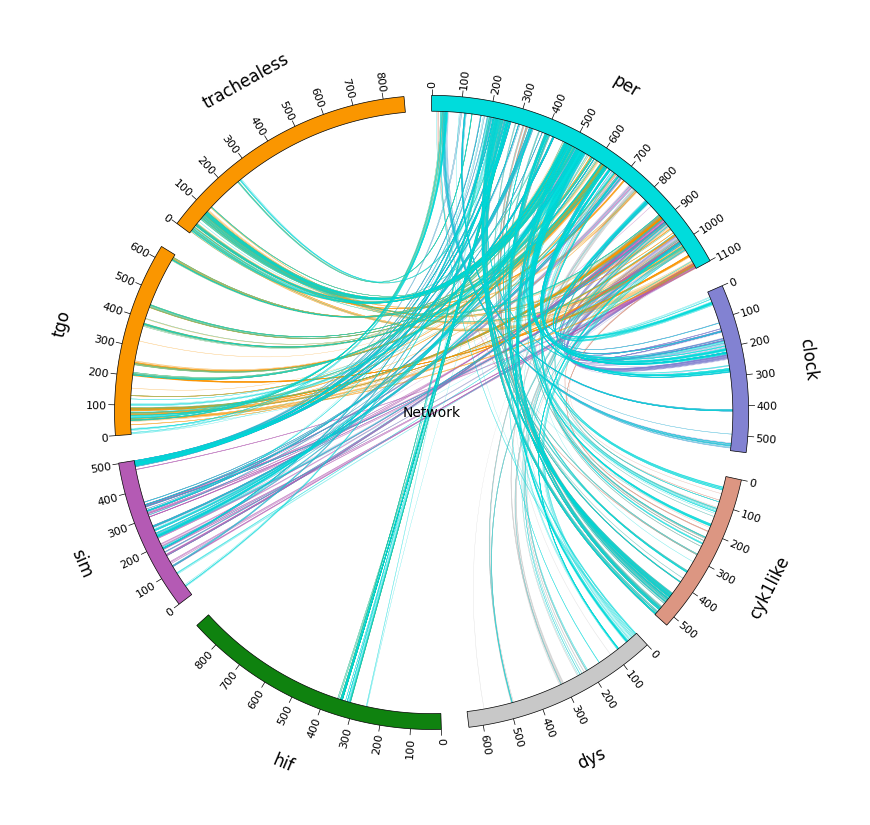

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from pycirclize import Circos
from pycirclize.utils import ColorCycler
ColorCycler.set_cmap("viridis")

location = "/mnt/d/from_desktop/alphafold_work/18.Per-domians_res/"
df = pd.read_csv(f"{location}/circos_table.txt", sep='\t')

import random
result = [((row['Connection_from'], row['Residue_start'], row['Residue_start']+1), 
(row['Connection_to'], row['Residue_start.1'], row['Residue_start.1']+1)) for index, 
row in df.iterrows()]

sectors = {"per": 1101, "clock": 553, "cyk1like": 535 ,"dys": 647, "hif": 888, "sim": 502 ,"tgo": 641, "trachealess": 868}
# name2color = {"A": "red", "B": "blue", "C": "green"}
name2color = {"per":"#00DCDC","clock":"#8282D2","cyk1like":"#DC9682","dys":"#C8C8C8","sim":"#B45AB4","tgo":"#FA9600","trachealess":"#FA9600","hif":"#0F820F"}
circos = Circos(sectors, space=5)
plddt_color = {"Very Low": "#e9822b", "Low": "#f3ed23", "Confident": "#41cdf0", "Very High": "#336bfe"}

for sector in circos.sectors:
    print(sector.name)
    protein = sector.add_track((95, 100))

    # for confidence in plddt_dictionary[sector.name]:
    #     start, end = float(confidence[1]),float(confidence[2])
    #     protein.rect(start, end, fc=plddt_color[confidence[0]])
    
    protein.axis(fc=name2color[sector.name])
    protein.text(sector.name,None ,120, color="black", size=12)
    protein.xticks_by_interval(100, label_orientation="vertical")

    # domain_track = sector.add_track((90, 93))
    # domain_track.axis()
    # Plot rect & text (style1)
    # for domain_details in domain_dictionary[sector.name]:
    #     start, end = float(domain_details[1]),float(domain_details[2])
    #     domain_track.rect(start, end, fc="#8282D2", lw=1)
    #     # domain_track.text(domain_details[0],(end + start) / 2,color="black", size=5)

    # exon_track = sector.add_track((84, 88))
    # # exon_track.axis()
    # # Plot rect & text (style1)
    # for idx,exon_details in enumerate(exon_dictionary[sector.name]):
    #     exon_boundaries = exon_details.split("-")
    #     start, end = float(exon_boundaries[0]),float(exon_boundaries[1])
    #     exon_track.rect(start, end, fc="#ADD8E6", ec="Grey", lw=1)
    #     exon_track.text(str(idx+1), (end + start) / 2, color="black", size=5, orientation="vertical")

# fig = circos.plotfig()
for link in result:
    # print(link[0], link[1])
    circos.link(link[0], link[1],color=name2color[link[0][0]])

circos.text("Network")


fig = circos.plotfig()
fig.savefig(f"{location}/circos_plot_2.svg", format="svg")